In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('salary_data_cleaned.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'job_state', 'job_city', 'same_state', 'age', 'python_yn', 'r_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [3]:
#Feature Engineering


def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [4]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [5]:
df['job_simp'].value_counts()

data scientist    52
na                18
data engineer     12
analyst            9
mle                7
manager            1
director           1
Name: job_simp, dtype: int64

In [6]:
df['seniority'] = df['Job Title'].apply(seniority)

In [7]:
df['seniority'].value_counts()

na        77
senior    23
Name: seniority, dtype: int64

In [8]:
#df['job_state']= df['job_state'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    13
MA    12
NY    11
VA     9
MO     6
NC     5
MD     4
IL     4
TX     3
DC     3
SC     3
RI     2
IN     2
NH     2
NE     2
WI     2
UT     2
WA     2
DE     1
KS     1
AZ     1
GA     1
PA     1
FL     1
OH     1
OR     1
TN     1
Name: job_state, dtype: int64

In [9]:
#df['column'] = df['job_state'].astype('str') 
#df.column.value_counts()

In [10]:
df['job_desc'] = df['Job Description'].apply(lambda x: len(x))

In [11]:
df['job_desc']

0     4076
1     2728
2     4794
3     3389
4     3482
      ... 
95    5355
96    3826
97     474
98    3182
99    6032
Name: job_desc, Length: 100, dtype: int64

In [12]:
df['Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [13]:
df['Competitors']

0     0
1     3
2     0
3     3
4     0
     ..
95    0
96    3
97    3
98    2
99    0
Name: Competitors, Length: 100, dtype: int64

In [14]:
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis = 1)

In [15]:
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis = 1)

In [16]:
df[df.hourly==1][['min_salary','max_salary','hourly']]

,min_salary,max_salary,hourly


In [17]:
df[df.hourly==1]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,job_state,job_city,same_state,age,python_yn,r_yn,spark,aws,excel,job_simp,seniority,job_desc


In [18]:
df[['hourly','min_salary','max_salary']]


,hourly,min_salary,max_salary
0,0,70,116
1,0,70,116
2,0,70,116
3,0,70,116
4,0,70,116
...,...,...,...
95,0,69,91
96,0,69,91
97,0,69,91
98,0,69,91


In [19]:
df['Company Name']

0     Man
1     Aff
2     Mat
3     Hea
4     XSE
     ... 
95    Rel
96    Shi
97    Int
98    SAI
99    Rub
Name: Company Name, Length: 100, dtype: object

In [20]:
df.describe()

,Rating,Founded,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,r_yn,spark,aws,excel,job_desc
count,100.000000,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.741000,1949.920000,0.600000,0.0,0.0,62.100000,101.800000,81.950000,0.560000,29.640000,0.680000,0.040000,0.310000,0.220000,0.040000,3572.850000
std,0.954214,282.255944,1.180652,0.0,0.0,18.976061,29.218093,23.922697,0.498888,35.041251,0.468826,0.196946,0.464823,0.416333,0.196946,1441.021189
min,-1.000000,-1.000000,0.000000,0.0,0.0,34.000000,61.000000,47.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,399.000000
25%,3.400000,1984.500000,0.000000,0.0,0.0,34.000000,61.000000,47.500000,0.000000,8.750000,0.000000,0.000000,0.000000,0.000000,0.000000,2811.000000
50%,3.700000,2000.000000,0.000000,0.0,0.0,70.000000,116.000000,93.000000,1.000000,19.500000,1.000000,0.000000,0.000000,0.000000,0.000000,3485.500000
75%,4.325000,2011.000000,0.000000,0.0,0.0,80.000000,132.000000,106.000000,1.000000,32.500000,1.000000,0.000000,1.000000,0.000000,0.000000,4206.750000
max,5.000000,2019.000000,3.000000,0.0,0.0,80.000000,132.000000,106.000000,1.000000,239.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8749.000000


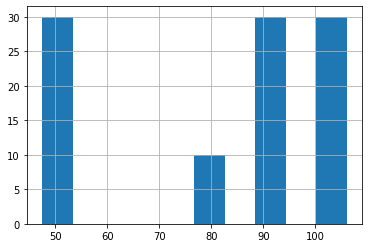

In [21]:
df.avg_salary.hist()

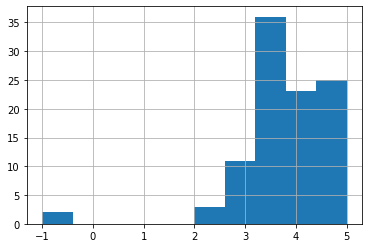

In [22]:
df.Rating.hist()

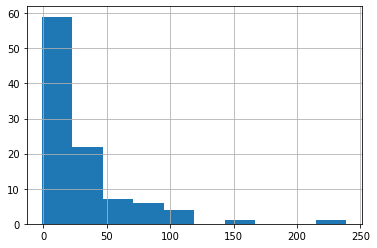

In [23]:
df.age.hist()

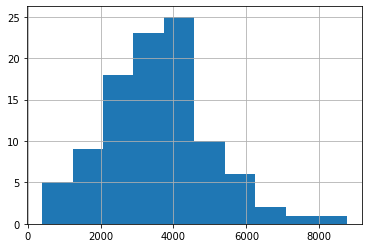

In [24]:
df.job_desc.hist()

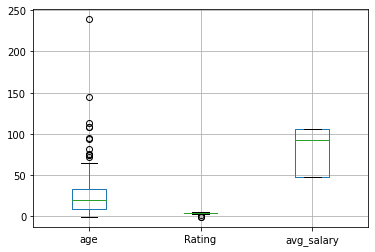

In [25]:
df.boxplot(column=['age','Rating',
                   'avg_salary'])

In [26]:
#look at histograms and box plots of the continuous data fields. This is an important step because we want normal data if we plan to do a regression analysis. 
#look at the categorical data. We want to see what companies, states, industries, and sectors these jobs are offered in. 
#make some pivot tables to better understand how average salary is different across our categorical categories. 
#make a word cloud to visualize some of the most common words found in the descriptions. 


In [27]:
df[['age','avg_salary','Rating','job_desc']].corr()


,age,avg_salary,Rating,job_desc
age,1.000000,0.009540,-0.036893,0.140068
avg_salary,0.009540,1.000000,0.163571,0.150205
Rating,-0.036893,0.163571,1.000000,-0.012232
job_desc,0.140068,0.150205,-0.012232,1.000000


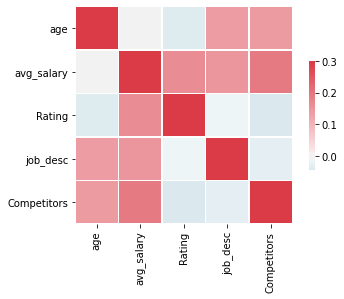

In [28]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','job_desc','Competitors']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [29]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'job_state','same_state', 'python_yn', 'r_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for Location: total = 64


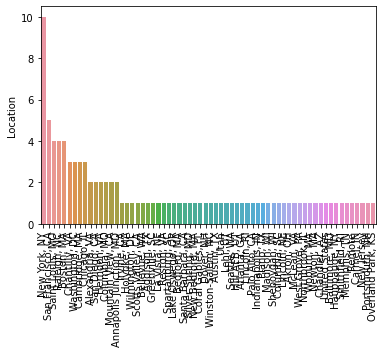

graph for Headquarters: total = 68


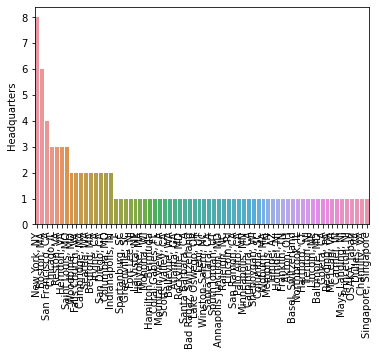

graph for Size: total = 8


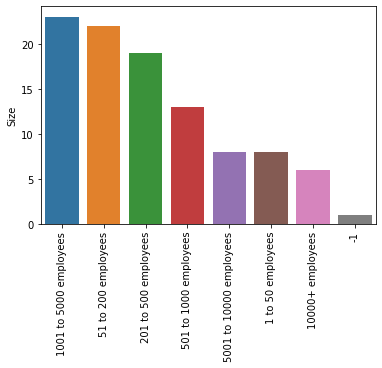

graph for Type of ownership: total = 7


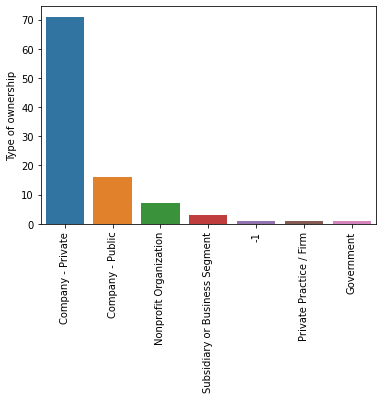

graph for Industry: total = 25


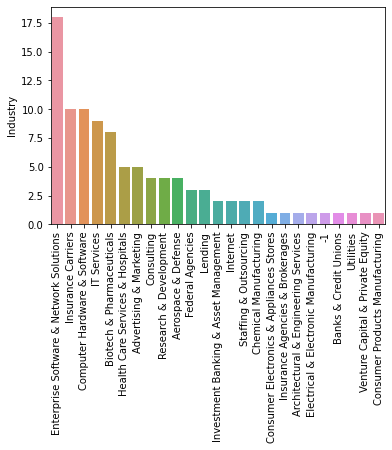

graph for Sector: total = 12


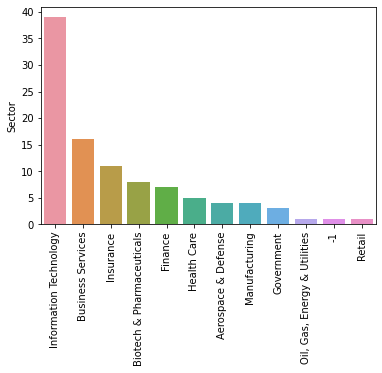

graph for Revenue: total = 14


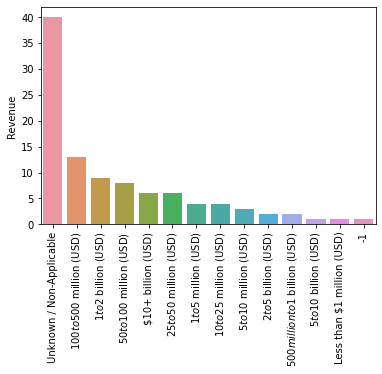

graph for job_state: total = 27


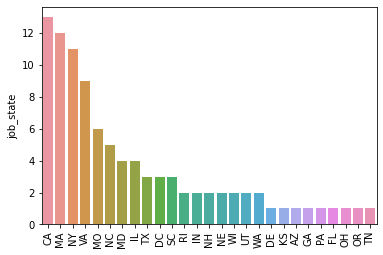

graph for same_state: total = 2


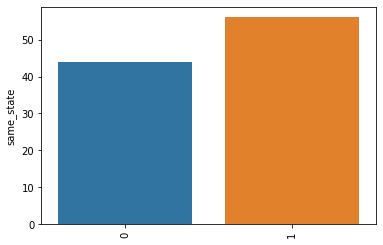

graph for python_yn: total = 2


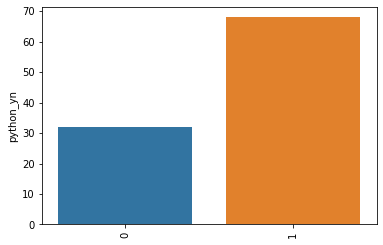

graph for r_yn: total = 2


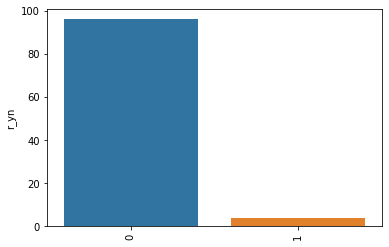

graph for spark: total = 2


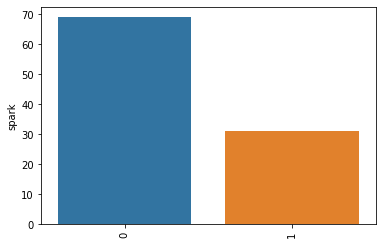

graph for aws: total = 2


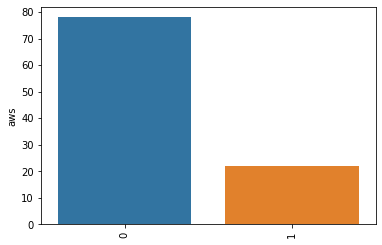

graph for excel: total = 2


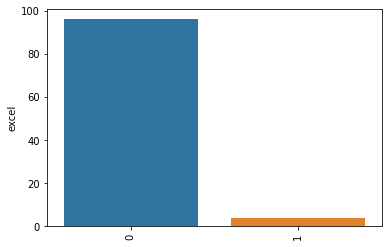

graph for job_simp: total = 7


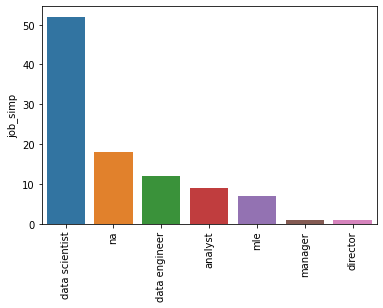

graph for seniority: total = 2


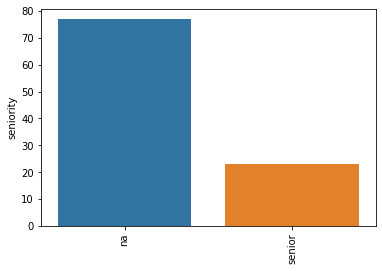

In [30]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [31]:
pd.pivot_table(df, index = ['job_state'],values='avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
OH,106.000000
WA,106.000000
GA,106.000000
DC,97.333333
VA,93.000000
TN,93.000000
AZ,93.000000
IL,93.000000
KS,93.000000


In [32]:
df["Job Description"]

0     Secure our Nation, Ignite your Future\n\nJoin ...
1     Data Scientist\nAffinity Solutions / Marketing...
2     Position Description:\n\nWant to make a differ...
3     Description\n\nThe Senior Data Scientist is re...
4     Ready to write the best chapter of your career...
                            ...                        
95    We are Relativity. A market-leading, global te...
96    Introduction to Shield\nShield AI’s mission is...
97    Intuit is looking for innovative and hands-on ...
98    Description\n\nSAIC is seeking an individual f...
99    Rubius Therapeutics is a clinical-stage biopha...
Name: Job Description, Length: 100, dtype: object

In [33]:
!pip install wordcloud
!pip install nltk


from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


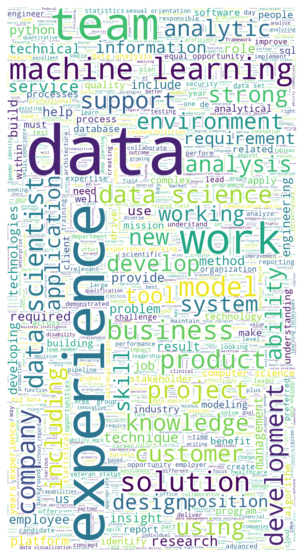

In [34]:
nltk.download('punkt')
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [38]:
pd.pivot_table(df,index = 'job_simp', values = 'avg_salary').sort_values('avg_salary',ascending=False)

,avg_salary
job_simp,
manager,106.000000
data scientist,86.625000
mle,82.785714
data engineer,81.083333
director,80.000000
na,78.916667
analyst,59.055556


In [39]:
pd.pivot_table(df,index = ['job_simp','seniority'], values = 'avg_salary').sort_values('avg_salary',ascending=False)

avg_salary
job_simp       seniority            
manager        na         106.000000
data scientist na          88.162791
data engineer  senior      88.125000
mle            na          84.333333
               senior      81.625000
na             senior      81.625000
director       senior      80.000000
data scientist senior      79.277778
na             na          78.142857
data engineer  na          77.562500
analyst        na          60.500000
               senior      47.500000

In [43]:
pd.pivot_table(df,index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state',ascending=False)

avg_salary
job_state job_simp                  
WI        mle             106.000000
          data scientist   47.500000
WA        na              106.000000
          data scientist  106.000000
VA        na              106.000000
          mle              80.000000
          data scientist   93.000000
UT        data scientist   47.500000
          data engineer   106.000000
TX        analyst         106.000000
          data scientist   47.500000
          data engineer    47.500000
TN        data scientist   93.000000
SC        na               80.000000
          analyst          47.500000
RI        director         80.000000
          analyst          47.500000
PA        na               47.500000
OR        data scientist   47.500000
OH        na              106.000000
NY        na               70.250000
          data scientist   77.400000
          data engineer   106.000000
          analyst          47.500000
NH        na               80.000000
          mle              93.000000
NE        na              106.000000
          analyst          47.500000
NC        na               76.750000
          mle              93.000000
          data scientist   93.000000
MO        na               47.500000
          data scientist   82.166667
          data engineer   106.000000
          analyst          93.000000
MD        na               47.500000
          data scientist   97.333333
MA        data scientist   90.111111
          na               76.750000
          mle              80.000000
KS        data scientist   93.000000
IN        analyst          47.500000
          na               93.000000
IL        na              106.000000
          data scientist   93.000000
          data engineer    80.000000
GA        data scientist  106.000000
FL        data engineer    80.000000
DE        data engineer    47.500000
DC        data scientist   97.333333
CA        manager         106.000000
          data scientist   96.250000
          data engineer    47.500000
          mle              80.000000
          na               47.500000
AZ        data engineer    93.000000

In [44]:
pd.options.display.max_rows

60

In [46]:
pd.set_option('display.max_rows', None)

In [53]:
pd.pivot_table(df,index=['job_state','job_simp'],values = 'avg_salary',aggfunc='count').sort_values('job_state',ascending=True)

avg_salary
job_state job_simp                  
AZ        data engineer            1
CA        data engineer            2
          data scientist           8
          manager                  1
          mle                      1
          na                       1
DC        data scientist           3
DE        data engineer            1
FL        data engineer            1
GA        data scientist           1
IL        data scientist           2
          na                       1
          data engineer            1
IN        analyst                  1
          na                       1
KS        data scientist           1
MA        data scientist           9
          mle                      1
          na                       2
MD        data scientist           3
          na                       1
MO        na                       1
          analyst                  1
          data engineer            1
          data scientist           3
NC        mle                      1
          na                       2
          data scientist           2
NE        analyst                  1
          na                       1
NH        mle                      1
          na                       1
NY        analyst                  2
          data engineer            2
          data scientist           5
          na                       2
OH        na                       1
OR        data scientist           1
PA        na                       1
RI        director                 1
          analyst                  1
SC        na                       1
          analyst                  2
TN        data scientist           1
TX        analyst                  1
          data engineer            1
          data scientist           1
UT        data engineer            1
          data scientist           1
VA        data scientist           7
          mle                      1
          na                       1
WA        data scientist           1
          na                       1
WI        data scientist           1
          mle                      1

In [54]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)


,avg_salary
job_state,
GA,106.000000
WA,106.000000
DC,97.333333
MD,97.333333
CA,96.250000
VA,93.000000
TN,93.000000
NC,93.000000
KS,93.000000


In [58]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly', 'employer_provided', 'python_yn', 'r_yn', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]


In [57]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'job_state', 'job_city', 'same_state', 'age', 'python_yn', 'r_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'job_desc'],
      dtype='object')

In [64]:
for i in df_pivots:
  print(i)
  print(pd.pivot_table(df,index = i,values = 'avg_salary').sort_values('avg_salary',ascending=False))

Rating
        avg_salary
Rating            
 2.8    106.000000
 2.9    101.666667
 4.1     99.500000
 3.6     93.928571
 2.2     93.000000
 3.2     93.000000
 3.1     91.700000
 4.7     88.125000
 3.5     87.222222
 5.0     86.500000
 4.2     86.500000
 3.7     85.687500
 4.4     83.900000
 3.8     81.625000
 3.4     81.300000
 4.5     78.375000
 4.8     77.833333
 4.9     76.750000
 3.9     73.500000
 2.7     70.250000
 4.0     62.125000
 3.3     59.200000
 2.0     47.500000
 4.3     47.500000
 2.4     47.500000
-1.0     47.500000
Industry
                                          avg_salary
Industry                                            
Architectural & Engineering Services      106.000000
Utilities                                 106.000000
Consumer Electronics & Appliances Stores  106.000000
Chemical Manufacturing                     99.500000
Research & Development                     96.250000
Consulting                                 96.250000
Investment Banking & Asset M

ValueError: ignored

In [65]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),2.0,7.0
$1 to $5 million (USD),NaN,4.0
$10 to $25 million (USD),1.0,3.0
$10+ billion (USD),1.0,5.0
$100 to $500 million (USD),4.0,9.0
$2 to $5 billion (USD),1.0,1.0
$25 to $50 million (USD),2.0,4.0
$5 to $10 billion (USD),1.0,NaN
$5 to $10 million (USD),NaN,3.0
